In [1]:
%pylab notebook
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import random
import sys
sys.path.append('/home/qyli/oPDF2')

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
fileCM = '../proxy/cluster/G3X-CM-masscomplete-ALL.txt'
filefit = '../proxy/cluster/GXsub_DM_fitmc_rcin200_100000_TMP.txt'
dataCM = np.loadtxt(fileCM)
datafit = np.loadtxt(filefit)
import oPDFplus as opd
mmtrue = datafit[:,0] / dataCM[:,2] * 1e15
cctrue = datafit[:,1] / dataCM[:,6]
loc = opd.sigma3sel(np.log10(mmtrue),np.log10(cctrue))

318
312
311
310
310


In [3]:
target = np.loadtxt('../proxy/cluster/GXsub_DM_InL_rcin200_100000_TMP.txt')[loc]

#==========================================================================
maind = np.loadtxt('../proxy/GadgetX_DS_main_v2')
maind = maind[loc,1:]

#--------------------------------------------------------------------------
JeansE = np.loadtxt('../proxy/JeansE_DM_lnL_rcin200_n100000_bin20_boot200')[loc]
fJeansE = np.append(maind, JeansE.reshape(310,1), axis = 1)

#--------------------------------------------------------------------------
#ob features
SZ_fea = np.loadtxt('../proxy/GadgetX_DS_SZ')[loc,1:]
Xray_fea = np.loadtxt('../proxy/GadgetX_DS_Xray')[loc,1:]
Offset_fea = np.loadtxt('../proxy/GadgetX_DS_Offset')[loc,1:]
dSZ = SZ_fea
dXray = Xray_fea
dOffset = Offset_fea

fSZ = np.append(maind, dSZ, axis = 1)
fXray = np.append(maind, dXray, axis = 1)
fOffset = np.append(maind, dOffset, axis = 1)
Ob = np.hstack((dSZ, dXray, dOffset))
fOb = np.append(maind, Ob, axis = 1)

oob_all = np.zeros(50)
oob_JeansE = np.zeros(50)
oob_ob = np.zeros(50)
oob_oball = np.zeros(50)
oob_SZ = np.zeros(50)
oob_Xray = np.zeros(50)
oob_Offset = np.zeros(50)
for k in range(50):
    x_train,x_test,y_train,y_test = train_test_split(maind, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_all[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(fJeansE, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_JeansE[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(fOb, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_ob[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(Ob, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_oball[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(fSZ, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_SZ[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(fXray, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_Xray[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(fOffset, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_Offset[k] = forest.oob_score_
        

In [4]:
oob_SZ0 = np.zeros(50)
oob_Xray0 = np.zeros(50)
oob_Offset0 = np.zeros(50)
for k in range(50):
    x_train,x_test,y_train,y_test = train_test_split(dSZ, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 10, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_SZ0[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(dXray, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 10, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_Xray0[k] = forest.oob_score_
    
    x_train,x_test,y_train,y_test = train_test_split(dOffset, target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_Offset0[k] = forest.oob_score_

In [5]:
oob_oneJeans = np.zeros(50)
for k in range(50):
    x_train,x_test,y_train,y_test = train_test_split(JeansE.reshape(310,1), target, test_size=0.3, random_state=k)
    forest = RandomForestRegressor(n_estimators=400, min_samples_leaf = 5, random_state=k,  oob_score = True)
    forest.fit(x_train, y_train)
    oob_oneJeans[k] = forest.oob_score_

<IPython.core.display.Javascript object>


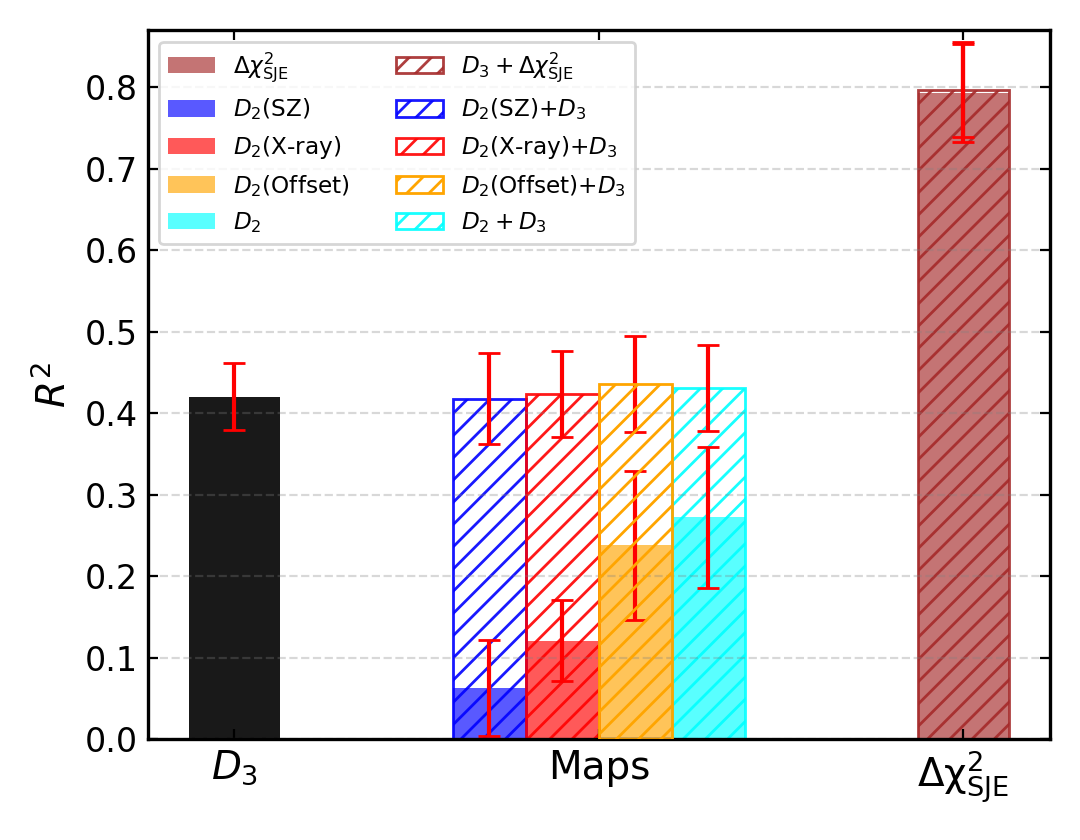

0.27189241041979
0.06318578192978562 0.12094436909121876 0.23752463639129878 0.27189241041979
0.42002823352883445 0.7966486784571599 0.793081286674528


In [9]:
fig = plt.figure(figsize= (5.4,4.2))

# labels = ['DS','DS+OB', r'$\rm DS+\chi_{\rm Jeans}$']
# oobs = [np.mean(oob_all), 0.42, np.mean(oob_JeansE)]
# col = ['k','b','grey']
print(oob_oball.mean())
plt.bar(0.4,oob_all.mean(), color = 'k', width = 0.15, alpha = 0.9)
plt.bar(1.6,oob_oneJeans.mean(), color = 'brown',width = 0.15, alpha = 0.65,label = r'$\Delta \chi_{\rm SJE}^2$')

dx = 0.12
xp = 1
plt.bar(xp-2*dx+dx/2,oob_SZ0.mean(), color = 'b', width = dx, alpha = 0.65,label = r'$D_2$(SZ)')
plt.bar(xp-dx+dx/2,oob_Xray0.mean(), color = 'r', width = dx, alpha = 0.65,label = '$D_2$(X-ray)' )
plt.bar(xp+dx/2,oob_Offset0.mean(), color = 'orange', width = dx, alpha = 0.65,label = '$D_2$(Offset)')
plt.bar(xp+dx+dx/2,oob_oball.mean(), color = 'cyan', width = dx, alpha = 0.65,label = r'$D_2$')
print(oob_SZ0.mean(),oob_Xray0.mean(),oob_Offset0.mean(),oob_oball.mean())

plt.bar(1.6,oob_JeansE.mean(), edgecolor = 'brown', width = 0.15, alpha = 0.9, 
        hatch = '///',facecolor = 'none',
        label = r'$D_{3}+\Delta \chi^2_{\rm SJE}$')
print(oob_all.mean(),oob_JeansE.mean(),oob_oneJeans.mean())

plt.bar(xp-2*dx+dx/2,oob_SZ.mean(), edgecolor = 'b', facecolor = 'none',
        hatch = '///', width = dx, alpha = 0.9,label = r'$D_2$(SZ)+$D_3$')
plt.bar(xp-dx+dx/2,oob_Xray.mean(), edgecolor = 'r', facecolor = 'none',
        hatch = '///',width = dx, alpha = 0.9,label = r'$D_2$(X-ray)+$D_3$' )
plt.bar(xp+dx/2,oob_Offset.mean(), edgecolor = 'orange', facecolor = 'none', 
        hatch = '///',width = dx, alpha = 1, zorder =3, label = r'$D_2$(Offset)+$D_3$')
plt.bar(xp+dx+dx/2,oob_ob.mean(), edgecolor = 'cyan', facecolor = 'none',
        hatch = '///', width = dx, alpha = 0.9, label = r'$D_2+D_3$')

#plot errorbar=============================
plt.errorbar(0.4, oob_all.mean(), yerr = oob_all.std(), capsize = 4, ls = 'none', color = 'r')

plt.errorbar(xp-2*dx+dx/2, oob_SZ0.mean(), yerr = oob_SZ0.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp-dx+dx/2,oob_Xray0.mean(), yerr = oob_Xray0.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp+dx/2,oob_Offset0.mean(), yerr = oob_Offset0.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp+dx+dx/2,oob_oball.mean(), yerr = oob_oball.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')

plt.errorbar(xp-2*dx+dx/2,oob_SZ.mean(), yerr = oob_SZ.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp-dx+dx/2,oob_Xray.mean(), yerr = oob_Xray.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp+dx/2,oob_Offset.mean(), yerr = oob_Offset.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(xp+dx+dx/2,oob_ob.mean(), yerr = oob_ob.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')

plt.errorbar(1.6,oob_oneJeans.mean(), yerr = oob_oneJeans.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')
plt.errorbar(1.6,oob_JeansE.mean(), yerr = oob_JeansE.std()*np.sqrt(2), capsize = 4, ls = 'none', color = 'r')



# plt.legend(ncol = 2, fontsize = 'small',loc = (0.03,0.68))
plt.legend(ncol = 2, fontsize = 'small',loc = 2)
plt.ylabel('$R^2$',fontsize = 14)
plt.tick_params(axis = 'x', labelsize = 14)
plt.grid(c = 'grey',alpha = 0.3,ls='--', axis = 'y')

# ax = fig.add_axes([0,0,1,1])
# ax.bar(3 + 0.00, 0.5, color = 'b', width = 0.25)
# plt.tick_params(axis = 'y',left = True,labelleft = False)

plt.tick_params(top = 'on', right = 'on', which='both', labelsize = 12, direction = 'in')
plt.xticks([0.4,xp,1.6],(r'$D_3$', 'Maps', r'$\rm \Delta \chi^2_{\rm SJE}$'),fontsize = 14)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],('0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8'))

plt.ylim(0,0.87)
plt.tight_layout()

bwith = 1.2 #边框宽度设置为2
ax = plt.gca()#获取边框
ax.spines['bottom'].set_linewidth(bwith)
ax.spines['left'].set_linewidth(bwith)
ax.spines['top'].set_linewidth(bwith)
ax.spines['right'].set_linewidth(bwith)

plt.savefig('./figs/total_sqrt2.pdf')

In [7]:
print(np.std(oob_all), np.std(oob_oneJeans), np.std(oob_SZ0), np.std(oob_Xray0), np.std(oob_Offset0))

0.040843718331587016 0.04240106395805533 0.04166450047208087 0.03521194106446779 0.0644587527812796
